# Neural Network from Scratch in Python

In [1]:
from dataclasses import dataclass
from abc import ABC, abstractmethod
import numpy as np
from typing import List
import matplotlib.pyplot as plt

## 1 Layer, 1 Neuron Neural Network, OR logic gate
What goes on inside a perceptron?

$z = \mathbf{w} \cdot \mathbf{x} + b = w_0x_0 + w_1x_1 + b$

We introduce non-linearity to the system using the sigmoid function i.e.
$a = \sigma(z) = \frac{1}{1+e^{-z}}$

### Backpropagation
The problem regards how we actually update the weights of each neuron in the system. A common method utilises what is called the _gradient descent_ algorithm.
This involves updating the weights of each neuron, every epoch we train the model. A hyperparameter $\eta$ is introduced which is commonly called the _learning rate_ (LR) or occassionally _mixing parameter_.

$
\begin{equation}
\mathbf{w}' = \mathbf{w} - \eta \frac{\partial E}{\partial \mathbf{w}}
\end{equation}
$

We use the chain rule to solve $\frac{\partial E}{\partial \mathbf{w}}$ i.e.
$\begin{equation}
\frac{\partial E}{\partial \mathbf{w}} = \frac{\partial E}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial \mathbf{w}}
\end{equation}$

Solving each term (assuming the Error Function is MSE here and activation function is sigmoid in this case):
$\begin{equation}
\frac{\partial E}{\partial a} = \frac{\partial}{\partial a}\frac{1}{2} (y - a)^2 = a - y
\end{equation}$

$\begin{equation}
\frac{\partial a}{\partial z} = \frac{\partial}{\partial z}\sigma(z) = \sigma(z)(1 - \sigma(z))
\end{equation}$

$\begin{equation}
\frac{\partial z}{\partial \mathbf{w}} = \frac{\partial}{\partial \mathbf{w}} \mathbf{w} \cdot \mathbf{x} + b = \mathbf{x}
\end{equation}$

which finally gives us

$\begin{equation}
\frac{\partial E}{\partial \mathbf{w}} = (a - y) \times \sigma(z)(1 - \sigma(z)) \times \mathbf{x}
\end{equation}$

and finally what about the bias?

$\begin{equation}
\frac{\partial E}{\partial b} = \frac{\partial E}{\partial a} \frac{\partial a}{\partial z} \frac{\partial z}{\partial b}
\end{equation}$

We know most of these terms except the last

$\begin{equation}
\frac{\partial z}{\partial b} = \frac{\partial}{\partial b} \mathbf{w} \cdot \mathbf{x} + b = 1
\end{equation}$

and so, finally

$\begin{equation}
\frac{\partial E}{\partial b} = (a - y) \times \sigma(z)(1 - \sigma(z))
\end{equation}$

In [2]:
class ActivationFunction(ABC):
    @abstractmethod
    def function(self):
        pass

    @abstractmethod
    def derivative(self):
        pass

class ErrorFunction(ABC):
    @abstractmethod
    def function(self):
        pass

    def derivative(self):
        pass

In [296]:

@dataclass
class Sigmoid(ActivationFunction):
    name: str = 'sigmoid'

    def function(self, x):
        return 1/(1 + np.exp(-x))
    
    def derivative(self, x):
        return self.function(x)*(1-self.function(x))
    
@dataclass 
class MeanSquaredError(ErrorFunction):
    name: str = 'MSE'

    def function(self, a, y):
        return 0.5*(y - a)**2
    
    def derivative(self, a, y):
        return (a - y)

@dataclass
class Neuron():
    input_shape: int
    activation_function: ActivationFunction
    weights: np.ndarray[np.float64] = None
    bias: float = np.random.rand(1)
    error: float = 0
    delta: np.ndarray = np.array([])
    delta_weights: np.ndarray = np.array([])
    weights_gradient = 0
    bias_gradient = 0
    z: float = None
    a: float = None
    inputs = None

    def __post_init__(self):
        """Initialise the weights. We do this post_initialisation because we depend
        on the input shape.
        """
        self.weights = np.random.rand(self.input_shape)

    def forward(self, x: np.ndarray) -> float:
        self.inputs = x
        self.z = np.dot(self.weights, x) + self.bias
        self.a = self.activation_function.function(self.z)

        return self.a
    
    #def backward(self, delta: np.ndarray):
    #    self.error = delta * self.activation_function.derivative(self.z)
    #    self.delta = np.append(self.delta, self.error)##

    #    return self.error
    
    def backward(self, delta: np.ndarray):
        self.error = delta * self.activation_function.derivative(self.z)
        self.weights_gradient +=  np.outer(delta, self.inputs)
        self.bias_gradient += delta

        return self.error
    
    def update_weights(self, lr=0.05):
        weights_gradient = np.mean(np.outer(self.delta, self.inputs), axis=0)
        bias_gradient = np.mean(self.delta)

        self.weights -= (np.squeeze(self.weights_gradient) * lr)
        self.bias -= ( self.bias_gradient * lr)

        self.weights_gradient = 0
        self.bias_gradient = 0


In [4]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
Y = [0, 1, 1, 1]

In [5]:
n1 = Neuron(2, Sigmoid())
for x, y in zip(X, Y):
    x = np.array(x)
    y = np.array(y)

    a = n1.forward(x)
    E = 0.5*(y - a)**2
    E_prime = (a - y)

print(E_prime)

-0.11344469587120076


In [6]:
n1.input_shape

2

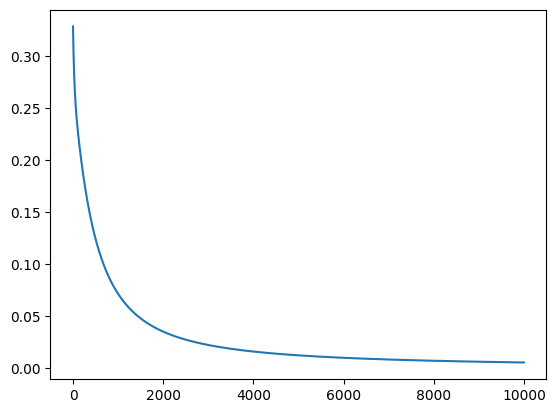

In [173]:
n1 = Neuron(2, Sigmoid())
all_E = []
for i in range(10000):
    E = 0
    for x, y in zip(X, Y):
        x = np.array(x)
        y = np.array(y)

        a = n1.forward(x)
        E += 0.5*(y - a)**2
        E_prime = (a - y)
        delta = n1.backward(E_prime)

        n1.update_weights()
    all_E += [E]

plt.figure()
plt.plot(all_E)
plt.show()

In [303]:
n0 = Neuron(2, Sigmoid())
n1 = Neuron(1, Sigmoid())

In [304]:
w0 = n0.weights
b0 = n0.bias
w1 = n1.weights
b1 = n1.bias

lr = 0.05

for i in range(10000):
    del_w0 = 0
    del_b0 = 0
    del_w1 = 0
    del_b1 = 0
    C = 0
    for x, y in zip(X, Y):
        z0 = np.dot(x, w0) + b0
        a0 = Sigmoid().function(z0)

        z1 = np.dot(a0, w1) + b1
        a1 = Sigmoid().function(z1)

        C += 0.5*(y - a1)**2

        delta = (a1 - y) * Sigmoid().derivative(z1)
        del_w1 += np.dot(delta, np.transpose(a0))
        del_b1 += delta

        delta_0 = np.dot(np.transpose(w1), delta) * Sigmoid().derivative(z0)

        del_w0 += np.outer(delta_0, np.transpose(x))
        del_b0 += delta_0
    if np.mod(i, 1000) == 0:
        print('Epoch: %d - %f\r' % (i, C/4), end='')
    break

    w0 -= (lr/4) * np.squeeze(del_w0)
    b0 -= (lr/4) * del_b0
    w1 -= (lr/4) * del_w1
    b1 -= (lr/4) * del_b1

In [305]:
del_w1

-0.1288890762918618

In [310]:
all_E = []
for i in range(10000):
    E = 0
    for x, y in zip(X, Y):
        x = np.array(x)
        y = np.array(y)

        a0 = n0.forward(x)
        a1 = n1.forward(a0)
        E += 0.5*(y - a1)**2
        E_prime = (a1 - y)
        #d1 = n1.backward(E_prime)
        #d1 = E_prime * n1.activation_function.derivative(n1.z)
        #n1.delta = np.append(n1.delta, d1)
        d1 = n1.backward(E_prime)
        d0 = n0.backward(np.dot(n1.weights.T, d1))


    n1.update_weights(lr=0.5)
    n0.update_weights(lr=0.5)
    all_E += [E]


c:\Users\David\miniconda3\envs\artify310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\David\miniconda3\envs\artify310\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\David\miniconda3\envs\artify310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,1)

In [312]:
n1.weights, n1.weights_gradient

(array([0.50307578]), array([[-1.06642033]]))

In [281]:
np.mean(np.outer(n1.delta, n1.inputs))

-0.017456486935902966

In [276]:
np.mean(np.outer(n0.delta, n0.inputs), axis=0)

array([-0.00334414, -0.00334414])

In [258]:
np.dot(n1.weights.T, d1), np.dot(delta, np.transpose(a0))

(-0.0697705855613764, -0.04287276500549477)

In [217]:
np.outer(n0.delta, n0.inputs.T)

array([[ 0.01947389,  0.01947389],
       [-0.00536482, -0.00536482],
       [-0.00558877, -0.00558877],
       [-0.00392533, -0.00392533]])

In [188]:
n0.weights.shape, np.array([0, 1]).shape

((2,), (2,))

In [192]:
np.multiply(n0.weights,  np.array([0, 1]))

array([ 0.        , -0.03047349])

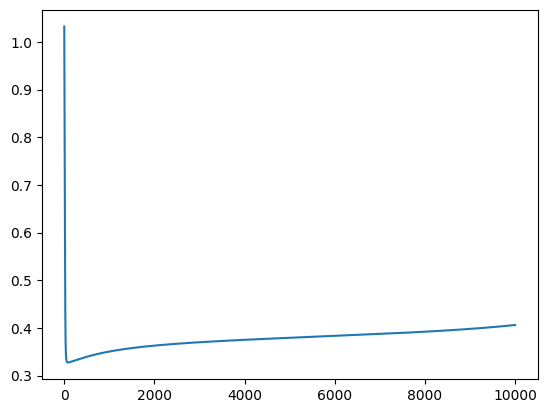

In [261]:
plt.figure()
plt.plot(all_E)
plt.show()

In [113]:
x = np.array([0, 0])
y = np.array(y)

a0 = n0.forward(x)
a1 = n1.forward(a0)

print(a1)

[0.74235078]


In [ ]:
@dataclass
class Layer():
    num_neurons: int
    activation: ActivationFunction
    input_shape: np.ndarray = None
    neurons: List[Neuron] = None
    inputs: np.ndarray = None
    previous_layer: 'Layer' = None

    # Note, we make the weights a property to retain the vectorizability.
    @property
    def weights(self):
        return np.array([n.weights for n in self.neurons])
    
    @weights.setter
    def weights(self, weights):
        for w, n in zip(weights, self.neurons):
            n.weights = w

    # TODO these probably don't need to be properties
    @property
    def a(self):
        return np.array([n.a for n in self.neurons])
    
    @property
    def z(self):
        return np.array([n.z for n in self.neurons])
    
    @property
    def error(self):
        return np.array([n.error for n in self.neurons])
    
    @property
    def delta(self):
        return np.array([n.delta for n in self.neurons])
    
    @property
    def l_inputs(self):
        return np.array([n.inputs for n in self.neurons])

    def __post_init__(self):
        if self.input_shape is not None:
            self.initialise_layer()

    def __call__(self, layer):
        self.input_shape = layer.num_neurons
        self.initialise_layer()
        self.previous_layer = layer
        return self
    
    def initialise_layer(self):
        self.neurons = [Neuron(self.input_shape, self.activation) for _ in range(self.num_neurons)]

    def forward(self, x):
        self.inputs = x
        for n in self.neurons: n.forward(x)
        return self.a
    
    #def backward(self, error, previous_output, lp1 = None):
    #    [n.backward(error, p) for n, p in zip(self.neurons, previous_output)]
    #    if lp1 is not None:
    #        error = compute_error_term(self, lp1)
    #        return error
        
    def backward(self, error_term):
        for n, delta in zip(self.neurons, error_term): 
            n.backward(delta)

    def update_weights(self, lr=0.05):
        for n in self.neurons:
            n.update_weights(lr)

def compute_error_term(layer, layerp1):
    error = np.zeros(len(layer.neurons))
    for i in range(len(layer.neurons)):
        for j in range(len(layerp1.neurons)):
            error[i] += layerp1.neurons[j].weights[i] * layerp1.neurons[j].error # compute the dot product iteratively.
    
    return error

In [ ]:
l0 = Layer(2, Sigmoid(), 2)
print(l0)
l1 = Layer(2, Sigmoid())(l0)
print(l1)
output = Layer(1, Sigmoid())(l1)
print(output)
#[n.backward(np.dot(np1.weights, np1.delta * np.ones_like(np1.weights)), a1) for n in l1.neurons for np1 in output.neurons]
#[n.backward(np.dot(np1.weights, np1.delta), a1) for n in l0.neurons for np1 in l1.neurons]
#print(output.neurons[0].delta)

In [ ]:
x = np.array([1, 1])
y = np.array([1])

a0 = l0.forward(x)
a1 = l1.forward(a0)
o = output.forward(a1)

E = 0.5*(y - o)**2
print(E)
E_prime = (o - y)

In [ ]:
a0, l1.inputs

In [ ]:
output.backward(E_prime)
l1.backward(np.dot(output.weights.T, output.error))
l0.backward(np.dot(l1.weights.T, l1.error))

In [ ]:
output.error

In [ ]:
l0.weights

In [ ]:
output.update_weights()
l1.update_weights()
l0.update_weights()

In [ ]:
l0.weights

# Testing implementation

In [ ]:
l0 = Layer(1, Sigmoid(), 2)
print(l0)
l1 = Layer(1, Sigmoid())(l0)
print(l1)
output = Layer(1, Sigmoid())(l1)
print(output)
#[n.backward(np.dot(np1.weights, np1.delta * np.ones_like(np1.weights)), a1) for n in l1.neurons for np1 in output.neurons]
#[n.backward(np.dot(np1.weights, np1.delta), a1) for n in l0.neurons for np1 in l1.neurons]
#print(output.neurons[0].delta)

In [ ]:
all_E = []

for i in range(100000):
    epoch_E = []
    for x, y in zip(X, Y):
        x = np.array(x)
        y = np.array(y)
        a0 = l0.forward(x)
        a1 = l1.forward(a0)
        o = output.forward(a1)

        E = 0.5*(y - o)**2
        epoch_E += [E]
        E_prime = (o - y)

        output.backward(E_prime)
        l1.backward(np.dot(output.weights.T, output.error))
        l0.backward(np.dot(l1.weights.T, l1.error))
    all_E += [np.mean(epoch_E)]
    print(all_E[-1])
    
    output.update_weights(lr=0.05)
    l1.update_weights(lr = 0.05)
    l0.update_weights(lr = 0.05)

In [ ]:
plt.figure()
plt.plot(all_E)
plt.show()

In [ ]:
x = np.array([1, 0])

a0 = l0.forward(x)
a1 = l1.forward(a0)
o = output.forward(a1)

print(o)

In [ ]:
y